In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, precision_score
import re
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [81]:
# pip install wordcloud

In [39]:
# Loading Dataset:
amazon = pd.read_csv (r"C:\Users\Adhil Najumudeen\Downloads\Amazon Review Data Web Scrapping - Amazon Review Data Web Scrapping.csv")
amazon

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating
0,136040,smartTv,Nice one,I liked it,5,Positive
1,134236,mobile,Huge battery life with amazing display,I bought the phone on Amazon and been using my...,5,Positive
2,113945,books,Four Stars,"Awesome book at reasonable price, must buy ......",4,Positive
3,168076,smartTv,Nice quality,good,5,Positive
4,157302,books,Nice book,"The book is fine,not bad,contains nice concept...",3,Neutral
...,...,...,...,...,...,...
60884,148315,smartTv,Good,Ok,4,Positive
60885,162092,smartTv,Five Stars,"Value for money, using since more than 4 month...",5,Positive
60886,164387,mobile,Best in prise,Very nice products,5,Positive
60887,133063,smartTv,Not gud pbone,Heating problem. Battery backup less than.,3,Neutral


In [41]:
amazon.head()

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating
0,136040,smartTv,Nice one,I liked it,5,Positive
1,134236,mobile,Huge battery life with amazing display,I bought the phone on Amazon and been using my...,5,Positive
2,113945,books,Four Stars,"Awesome book at reasonable price, must buy ......",4,Positive
3,168076,smartTv,Nice quality,good,5,Positive
4,157302,books,Nice book,"The book is fine,not bad,contains nice concept...",3,Neutral


In [43]:
amazon.tail()

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating
60884,148315,smartTv,Good,Ok,4,Positive
60885,162092,smartTv,Five Stars,"Value for money, using since more than 4 month...",5,Positive
60886,164387,mobile,Best in prise,Very nice products,5,Positive
60887,133063,smartTv,Not gud pbone,Heating problem. Battery backup less than.,3,Neutral
60888,167823,mobile,Not recommend,fingerprint reader average Camera quality belo...,3,Neutral


In [45]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60889 entries, 0 to 60888
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unique_ID      60889 non-null  int64 
 1   Category       60889 non-null  object
 2   Review_Header  60884 non-null  object
 3   Review_text    60857 non-null  object
 4   Rating         60889 non-null  int64 
 5   Own_Rating     60889 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.8+ MB


In [47]:
amazon.shape

(60889, 6)

In [49]:
amazon.size

365334

In [51]:
amazon.dtypes

Unique_ID         int64
Category         object
Review_Header    object
Review_text      object
Rating            int64
Own_Rating       object
dtype: object

In [53]:
amazon.isnull().sum()

Unique_ID         0
Category          0
Review_Header     5
Review_text      32
Rating            0
Own_Rating        0
dtype: int64

In [57]:
for i in ['Review_Header', 'Review_text']:
    amazon[i] = amazon[i].fillna(amazon[i].mode()[0])
amazon[i]

0                                               I liked it
1        I bought the phone on Amazon and been using my...
2        Awesome book at reasonable price, must buy ......
3                                                     good
4        The book is fine,not bad,contains nice concept...
                               ...                        
60884                                                   Ok
60885    Value for money, using since more than 4 month...
60886                                   Very nice products
60887           Heating problem. Battery backup less than.
60888    fingerprint reader average Camera quality belo...
Name: Review_text, Length: 60889, dtype: object

In [59]:
amazon.isnull().sum()

Unique_ID        0
Category         0
Review_Header    0
Review_text      0
Rating           0
Own_Rating       0
dtype: int64

In [65]:
dr = amazon.drop (['Unique_ID', 'Category', 'Review_Header', 'Rating'], axis = 1)
dr

,Review_text,Own_Rating
0,I liked it,Positive
1,I bought the phone on Amazon and been using my...,Positive
2,"Awesome book at reasonable price, must buy ......",Positive
3,good,Positive
4,"The book is fine,not bad,contains nice concept...",Neutral
...,...,...
60884,Ok,Positive
60885,"Value for money, using since more than 4 month...",Positive
60886,Very nice products,Positive
60887,Heating problem. Battery backup less than.,Neutral


In [79]:
dr.rename (columns = {'Review_text':'text', 'Own_Rating':'Rating'}, inplace = True)
dr

,text,Rating
0,I liked it,Positive
1,I bought the phone on Amazon and been using my...,Positive
2,"Awesome book at reasonable price, must buy ......",Positive
3,good,Positive
4,"The book is fine,not bad,contains nice concept...",Neutral
...,...,...
60884,Ok,Positive
60885,"Value for money, using since more than 4 month...",Positive
60886,Very nice products,Positive
60887,Heating problem. Battery backup less than.,Neutral


In [83]:
dr.shape

(60889, 2)

In [85]:
dr.describe()

,text,Rating
count,60889,60889
unique,49882,3
top,Good,Positive
freq,2348,47436


In [87]:
# WORDOPT 
def wordopt (text):
    text=text.lower()
    text=re.sub(r'\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub(r'https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub(r'\w*\d\w*','',text)
    return text

In [91]:
dr['text'] = dr['text'].apply(wordopt)
dr

,text,Rating
0,i liked it,Positive
1,i bought the phone on amazon and been using my...,Positive
2,awesome book at reasonable price must buy ...,Positive
3,good,Positive
4,the book is fine not bad contains nice concept...,Neutral
...,...,...
60884,ok,Positive
60885,value for money using since more than months...,Positive
60886,very nice products,Positive
60887,heating problem battery backup less than,Neutral


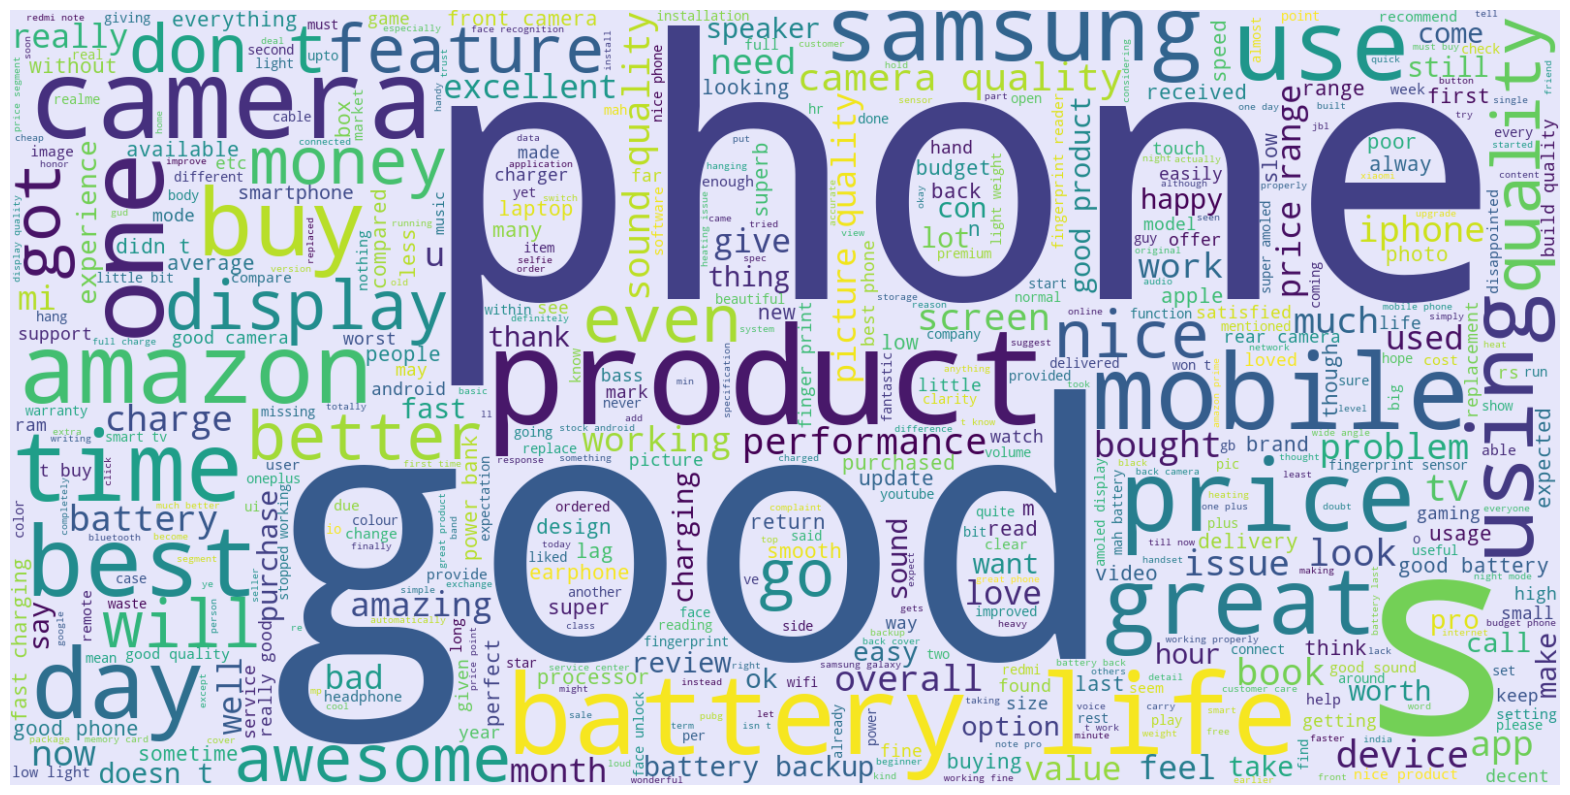

In [93]:
# Data Visualization:
text = ''.join ([word for word in dr['text']])
plt.figure(figsize = (20,15),facecolor='None')
wordcloud = WordCloud(max_words = 500, width = 1600, height = 800, background_color = "lavender").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [95]:
# Data Splitting:
x = dr['text']
y = dr ['Rating']

In [97]:
print (x)

0                                               i liked it
1        i bought the phone on amazon and been using my...
2        awesome book at reasonable price  must buy    ...
3                                                     good
4        the book is fine not bad contains nice concept...
                               ...                        
60884                                                   ok
60885    value for money  using since more than  months...
60886                                   very nice products
60887           heating problem  battery backup less than 
60888    fingerprint reader average camera quality belo...
Name: text, Length: 60889, dtype: object


In [99]:
print (y)

0        Positive
1        Positive
2        Positive
3        Positive
4         Neutral
           ...   
60884    Positive
60885    Positive
60886    Positive
60887     Neutral
60888     Neutral
Name: Rating, Length: 60889, dtype: object


In [101]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.25,random_state = 42)

In [103]:
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(45666,) (15223,) (45666,) (15223,)


In [107]:
# NLP: TfidfVectorizer
vect = TfidfVectorizer()
xv_train = vect.fit_transform(x_train)
xv_test = vect.transform(x_test)

In [108]:
xv_train

<45666x20324 sparse matrix of type '<class 'numpy.float64'>'
	with 846225 stored elements in Compressed Sparse Row format>

In [111]:
xv_test

<15223x20324 sparse matrix of type '<class 'numpy.float64'>'
	with 273616 stored elements in Compressed Sparse Row format>

In [113]:
xv_train.shape

(45666, 20324)

In [115]:
xv_test.shape

(15223, 20324)

In [117]:
# Model Building:
# 1. LogisticRegression
lr = LogisticRegression()
lr.fit (xv_train, y_train)

LogisticRegression()

In [119]:
pred_lr = lr.predict(xv_test)
pred_lr

array(['Positive', 'Positive', 'Negative', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [121]:
accuracy_lr = lr.score(xv_test, y_test)
accuracy_lr

0.8653353478289431

In [123]:
# 2. Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit (xv_train, y_train)

DecisionTreeClassifier()

In [124]:
pred_dtc = dtc.predict(xv_test)
pred_dtc

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [127]:
accu_dtc = accuracy_score(y_test, pred_dtc)
accu_dtc

0.8049004795375418

In [129]:
# 3. Random Forest Classifier
rfc = RandomForestClassifier(random_state = 0)
rfc.fit (xv_train, y_train)

RandomForestClassifier(random_state=0)

In [130]:
pred_rfc = rfc.predict(xv_test)
pred_rfc

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [131]:
accuracy_rfc = rfc.score(xv_test, y_test)
accuracy_rfc

0.8514090520922288

In [135]:
# CONCLUSION:
pd.set_option('display.max_colwidth', None)
x.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [137]:
y.head()

0    Positive
1    Positive
2    Positive
3    Positive
4     Neutral
Name: Rating, dtype: object

In [139]:
dr[200:210]

,text,Rating
200,worlds phone,Positive
201,fast charging cable is the best,Positive
202,i don t have to describe because everyone knows that iphones are iphones they are fabulous the only thing i have to say that it s high stainless steel getting scratches very easily so tale care of ur expensive iphone,Positive
203,microphone not working in the first month itself,Negative
204,supur,Positive
205,pros lovely display monster battery handy design decent software always on display option cons slow camera while on focus below average picture clarity not an expected one average built quality no gorilla glass protection as informed better to buy tempered glass and back panel conclusion better performance for this price range we can buy if we find some good deals,Positive
206,love this product,Positive
207,amazing at this price point,Positive
208,i don t like this phone,Negative
209,superb product,Positive


In [141]:
# Sample prediction: Index[3]
ex_third_index = ['''awesome book at reasonable price  must buy'''] 
ex_vectorized = vect.transform(ex_third_index)
result = lr.predict(ex_vectorized)
print (result)

['Positive']
